In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
from random import sample

import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
print("Hello Capstone Project Course")

Hello Capstone Project Course


In [3]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cd47265564ab4099aa7ee894b11d9b85 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9anRYYE0tM5nBWIAr7D0HqBQziUVlVr4Fyoz5SdzViTl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_cd47265564ab4099aa7ee894b11d9b85.get_object(Bucket='corseracapstone-donotdelete-pr-nockeyvwpouqei',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_data_1.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df = df_data_1[['SEVERITYCODE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'LOCATION', 'X', 'Y', 'INCDTTM']]
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,LOCATION,X,Y,INCDTTM
0,2,Overcast,Wet,Daylight,Intersection,5TH AVE NE AND NE 103RD ST,-122.323148,47.703140,3/27/2013 2:54:00 PM
1,1,Raining,Wet,Dark - Street Lights On,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,-122.347294,47.647172,12/20/2006 6:55:00 PM
2,1,Overcast,Dry,Daylight,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,-122.334540,47.607871,11/18/2004 10:20:00 AM
3,1,Clear,Dry,Daylight,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,-122.334803,47.604803,3/29/2013 9:26:00 AM
4,2,Raining,Wet,Daylight,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,-122.306426,47.545739,1/28/2004 8:04:00 AM


In [6]:
import datetime
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['INCDTTM'].dt.year
df['Month']=df['INCDTTM'].dt.strftime('%b')
df['Day']=df['INCDTTM'].dt.day
df['Hour']=df['INCDTTM'].dt.hour
#df['Weekday']=df['INCDTTM'].dt.strftime('%a')
df['Weekday']=df['INCDTTM'].dt.dayofweek
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,LOCATION,X,Y,INCDTTM,Year,Month,Day,Hour,Weekday
0,2,Overcast,Wet,Daylight,Intersection,5TH AVE NE AND NE 103RD ST,-122.323148,47.703140,2013-03-27 14:54:00,2013,Mar,27,14,2
1,1,Raining,Wet,Dark - Street Lights On,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,-122.347294,47.647172,2006-12-20 18:55:00,2006,Dec,20,18,2
2,1,Overcast,Dry,Daylight,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,-122.334540,47.607871,2004-11-18 10:20:00,2004,Nov,18,10,3
3,1,Clear,Dry,Daylight,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,-122.334803,47.604803,2013-03-29 09:26:00,2013,Mar,29,9,4
4,2,Raining,Wet,Daylight,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,-122.306426,47.545739,2004-01-28 08:04:00,2004,Jan,28,8,2


In [7]:
df = df.dropna()

df = df[df['WEATHER']!='Unknown']
df = df[df['WEATHER']!='Other']
df = df[df['ROADCOND']!='Unknown']
df = df[df['ROADCOND']!='Other']
df = df[df['LIGHTCOND']!='Unknown']
df = df[df['LIGHTCOND']!='Other']
df.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,LOCATION,X,Y,INCDTTM,Year,Month,Day,Hour,Weekday
0,2,Overcast,Wet,Daylight,Intersection,5TH AVE NE AND NE 103RD ST,-122.323148,47.703140,2013-03-27 14:54:00,2013,Mar,27,14,2
1,1,Raining,Wet,Dark - Street Lights On,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,-122.347294,47.647172,2006-12-20 18:55:00,2006,Dec,20,18,2
2,1,Overcast,Dry,Daylight,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,-122.334540,47.607871,2004-11-18 10:20:00,2004,Nov,18,10,3
3,1,Clear,Dry,Daylight,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,-122.334803,47.604803,2013-03-29 09:26:00,2013,Mar,29,9,4
4,2,Raining,Wet,Daylight,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,-122.306426,47.545739,2004-01-28 08:04:00,2004,Jan,28,8,2


In [8]:
df.dtypes

SEVERITYCODE             int64
WEATHER                 object
ROADCOND                object
LIGHTCOND               object
ADDRTYPE                object
LOCATION                object
X                      float64
Y                      float64
INCDTTM         datetime64[ns]
Year                     int64
Month                   object
Day                      int64
Hour                     int64
Weekday                  int64
dtype: object

In [9]:
df['SEVERITYCODE'].value_counts()

1    111503
2     54714
Name: SEVERITYCODE, dtype: int64

In [10]:
df.sort_values(by=['SEVERITYCODE'], ascending=False, inplace=True)
#df['SEVERITYCODE'].value_counts()
df_1=df[df['SEVERITYCODE']==1]
df_2=df[df['SEVERITYCODE']==2]

df = pd.concat([df_2,df_1.sample(frac=0.5, replace=True, random_state=1)])
df.reset_index(drop=True, inplace=True)
df['SEVERITYCODE'].value_counts()


1    55752
2    54714
Name: SEVERITYCODE, dtype: int64

In [11]:
df['LOCATION'].value_counts()
df['LOCATION_freq'] = df.groupby(['LOCATION'])['LOCATION'].transform('count')
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE,LOCATION,X,Y,INCDTTM,Year,Month,Day,Hour,Weekday,LOCATION_freq
0,2,Overcast,Wet,Daylight,Intersection,5TH AVE NE AND NE 103RD ST,-122.323148,47.703140,2013-03-27 14:54:00,2013,Mar,27,14,2,26
1,2,Clear,Dry,Daylight,Intersection,JEFFERSON ST AND TERRY AVE,-122.322989,47.605305,2011-03-04 12:58:00,2011,Mar,4,12,4,17
2,2,Clear,Dry,Daylight,Block,RAINIER AVE S BETWEEN BOREN AVE S AND S JACKSO...,-122.313926,47.599015,2011-07-18 15:57:00,2011,Jul,18,15,0,23
3,2,Raining,Wet,Dark - Street Lights On,Intersection,9TH AVE AND VIRGINIA ST,-122.335736,47.616385,2011-04-27 22:30:00,2011,Apr,27,22,2,7
4,2,Overcast,Dry,Dark - Street Lights On,Intersection,1ST AVE W AND WESTERN AVE W,-122.358059,47.619023,2011-01-31 18:15:00,2011,Jan,31,18,0,21


In [12]:
df_1=df[df['SEVERITYCODE']==1]
df_2=df[df['SEVERITYCODE']==2]

df_1['LOCATION_freq_S1'] = df_1.groupby(['LOCATION'])['LOCATION'].transform('count')
df_2['LOCATION_freq_S2'] = df_2.groupby(['LOCATION'])['LOCATION'].transform('count')

df_1['LOCATION_freq_S2'] = df_1['LOCATION_freq'] - (df_1['LOCATION_freq_S1'])
df_2['LOCATION_freq_S1'] = df_2['LOCATION_freq'] - (df_2['LOCATION_freq_S2'])

df = pd.concat([df_2,df_1])

df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,ADDRTYPE,Day,Hour,INCDTTM,LIGHTCOND,LOCATION,LOCATION_freq,LOCATION_freq_S1,LOCATION_freq_S2,Month,ROADCOND,SEVERITYCODE,WEATHER,Weekday,X,Y,Year
0,Intersection,27,14,2013-03-27 14:54:00,Daylight,5TH AVE NE AND NE 103RD ST,26,11,15,Mar,Wet,2,Overcast,2,-122.323148,47.703140,2013
1,Intersection,4,12,2011-03-04 12:58:00,Daylight,JEFFERSON ST AND TERRY AVE,17,3,14,Mar,Dry,2,Clear,4,-122.322989,47.605305,2011
2,Block,18,15,2011-07-18 15:57:00,Daylight,RAINIER AVE S BETWEEN BOREN AVE S AND S JACKSO...,23,14,9,Jul,Dry,2,Clear,0,-122.313926,47.599015,2011
3,Intersection,27,22,2011-04-27 22:30:00,Dark - Street Lights On,9TH AVE AND VIRGINIA ST,7,3,4,Apr,Wet,2,Raining,2,-122.335736,47.616385,2011
4,Intersection,31,18,2011-01-31 18:15:00,Dark - Street Lights On,1ST AVE W AND WESTERN AVE W,21,7,14,Jan,Dry,2,Overcast,0,-122.358059,47.619023,2011


In [ ]:
import seaborn as sns

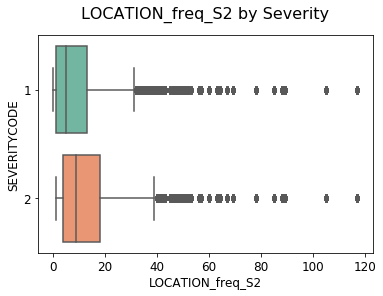

In [16]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('category')
sns.boxplot(x='LOCATION_freq_S2', y="SEVERITYCODE", data=df, palette="Set2")    
plt.xlabel('LOCATION_freq_S2', size=12, labelpad=3)
plt.ylabel('SEVERITYCODE', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('LOCATION_freq_S2 by Severity', size=16, y=1.05)
plt.show()

In [34]:
#df.sort_values(by=['LOCATION_freq_S2'], ascending=False).groupby(['LOCATION']).head()
df_locations=df.groupby(['LOCATION']).mean().sort_values(by=['LOCATION_freq'], ascending=False).head(20)

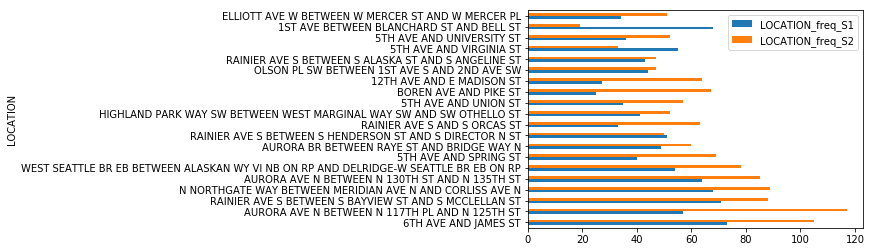

In [35]:
df_locations[['LOCATION_freq_S1','LOCATION_freq_S2']].plot(kind='barh')
plt.show()

In [15]:
#df['WEATHER'].value_counts()
#df['ROADCOND'].value_counts()
df['ADDRTYPE'].value_counts()

Block           66668
Intersection    43798
Name: ADDRTYPE, dtype: int64

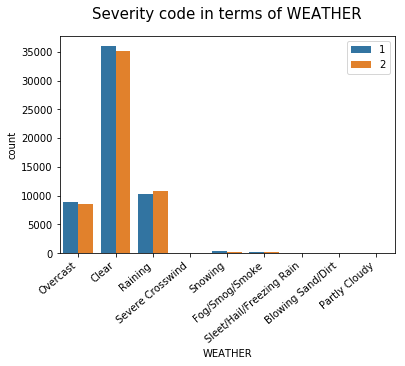

In [16]:
#Severity code in terms of Weather
ax=sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of WEATHER', size=15, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(loc='upper right')
plt.show()

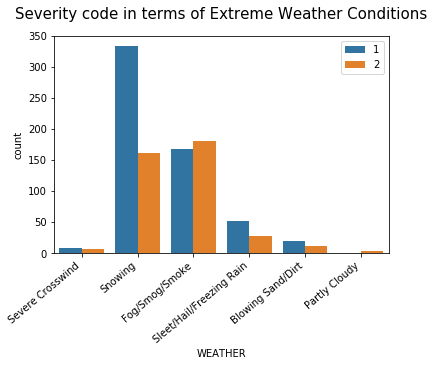

In [17]:
#Severity code for Extreme Weather Conditions
ax=sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df[~df['WEATHER'].isin(['Overcast','Clear','Raining'])])
plt.title('Severity code in terms of Extreme Weather Conditions', size=15, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend(loc='upper right')
plt.show()

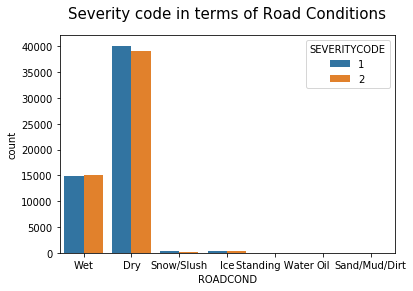

In [18]:
#Severity code in terms of Road Conditions
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of Road Conditions', size=15, y=1.05)
plt.show()

In [19]:
df_extreme=df[~df['ROADCOND'].isin(['Dry','Wet'])]


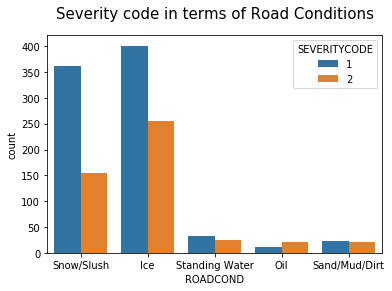

In [20]:
#Severity code for Extreme Road Conditions
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df_extreme)
plt.title('Severity code in terms of Road Conditions', size=15, y=1.05)
plt.show()

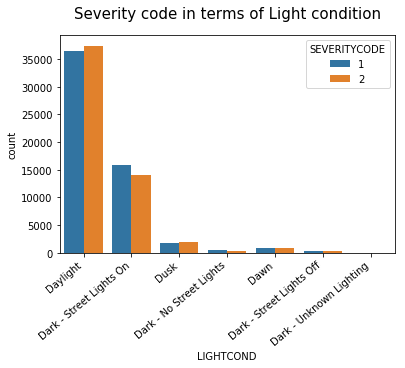

In [21]:
#Severity code in terms of Light condition
ax=sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of Light condition', size=15, y=1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

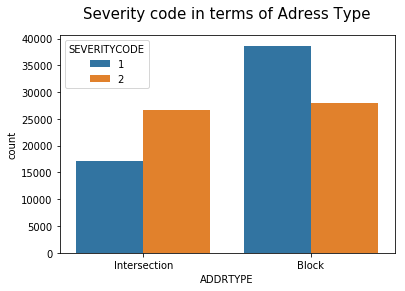

In [22]:
#Severity code in terms of Adress Type
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of Adress Type', size=15, y=1.05)
plt.show()

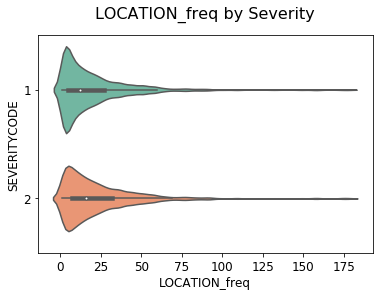

In [23]:
# plot
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('category')
sns.violinplot(x='LOCATION_freq', y="SEVERITYCODE", data=df, palette="Set2")    
plt.xlabel('LOCATION_freq', size=12, labelpad=3)
plt.ylabel('SEVERITYCODE', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('LOCATION_freq by Severity', size=16, y=1.05)
plt.show()

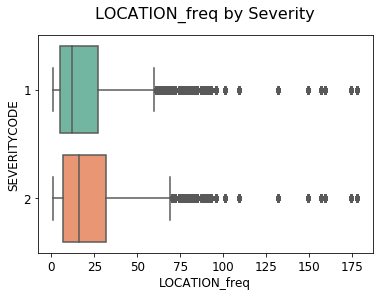

In [24]:
sns.boxplot(x='LOCATION_freq', y="SEVERITYCODE", data=df, palette="Set2")    
plt.xlabel('LOCATION_freq', size=12, labelpad=3)
plt.ylabel('SEVERITYCODE', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('LOCATION_freq by Severity', size=16, y=1.05)
plt.show()

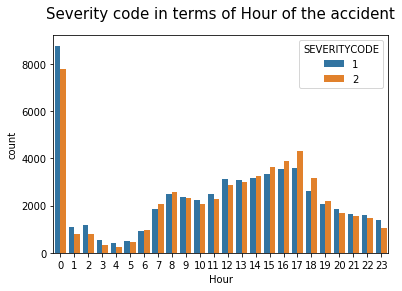

In [25]:
#Severity code in terms of Hour of the accident
sns.countplot(x='Hour', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of Hour of the accident', size=15, y=1.05)
plt.show()

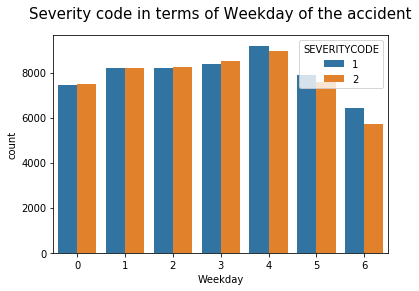

In [26]:
#Severity code in terms of Weekday of the accident
sns.countplot(x='Weekday', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of Weekday of the accident', size=15, y=1.05)
plt.show()

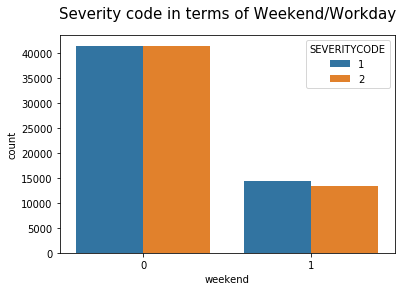

In [27]:
df['weekend'] = df['Weekday'].apply(lambda x: 1 if (x>4)  else 0)
df['night'] = df['Hour'].apply(lambda x: 1 if (x<7 or x>20)  else 0)

#Severity code in terms of Weekend/Workday
sns.countplot(x='weekend', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of Weekend/Workday', size=15, y=1.05)
plt.show()

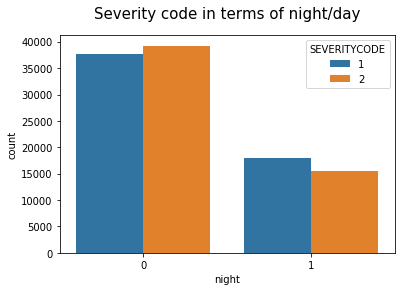

In [28]:
#Severity code in terms of night/day
sns.countplot(x='night', hue='SEVERITYCODE', data=df)
plt.title('Severity code in terms of night/day', size=15, y=1.05)
plt.show()

In [29]:
#Feature = df[['LOCATION_freq', 'night', 'weekend']]
Feature = df[['LOCATION_freq_S1','LOCATION_freq_S2','night', 'weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df[['ADDRTYPE','WEATHER', 'ROADCOND']])], axis=1)
#Feature.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE'], axis = 1,inplace=True)
Feature.columns

Index(['LOCATION_freq_S1', 'LOCATION_freq_S2', 'night', 'weekend',
       'ADDRTYPE_Block', 'ADDRTYPE_Intersection', 'WEATHER_Blowing Sand/Dirt',
       'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Overcast',
       'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'ROADCOND_Dry',
       'ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Sand/Mud/Dirt',
       'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Wet'],
      dtype='object')

In [30]:
#Feature = Feature[['WEATHER_Clear','WEATHER_Overcast','WEATHER_Raining','ROADCOND_Dry', 'ROADCOND_Wet', 'LIGHTCOND_Daylight', 'LIGHTCOND_Dark - Street Lights On']]
#Feature = Feature[['WEATHER_Clear','WEATHER_Overcast','WEATHER_Raining']]
X = Feature
y = df['SEVERITYCODE'].values

X[0:5]


,LOCATION_freq_S1,LOCATION_freq_S2,night,weekend,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,...,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet
0,11,15,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,14,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,14,9,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7,14,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [31]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.09568501,  0.25263248, -0.65911842, -0.5774548 , -1.23376252,
         1.23376252, -0.01675435, -1.34182973, -0.05621607,  2.30877236,
        -0.00521137, -0.48484138, -0.01165362, -0.0267519 , -0.06702278,
        -1.59157251, -0.07735061, -0.01702251, -0.01973352, -0.06843906,
        -0.02291995,  1.63920502],
       [-0.65517429,  0.18066027, -0.65911842, -0.5774548 , -1.23376252,
         1.23376252, -0.01675435,  0.74525104, -0.05621607, -0.43313062,
        -0.00521137, -0.48484138, -0.01165362, -0.0267519 , -0.06702278,
         0.62830942, -0.07735061, -0.01702251, -0.01973352, -0.06843906,
        -0.02291995, -0.61005182],
       [ 0.37725724, -0.17920083, -0.65911842, -0.5774548 ,  0.81052875,
        -0.81052875, -0.01675435,  0.74525104, -0.05621607, -0.43313062,
        -0.00521137, -0.48484138, -0.01165362, -0.0267519 , -0.06702278,
         0.62830942, -0.07735061, -0.01702251, -0.01973352, -0.06843906,
        -0.02291995, -0.61005182],
       [-0.65517429

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(str), test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77326, 22) (77326,)
Test set: (33140, 22) (33140,)


In [34]:
###KNN
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    print(n)
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

1
2
3
4
5
6
7
8
9
10
11
12
13
14


array([0.63476162, 0.62875679, 0.65476765, 0.64767652, 0.66143633,
       0.6565178 , 0.66535908, 0.66421243, 0.66931201, 0.67242004,
       0.67555824, 0.67492456, 0.67812311, 0.67450211])

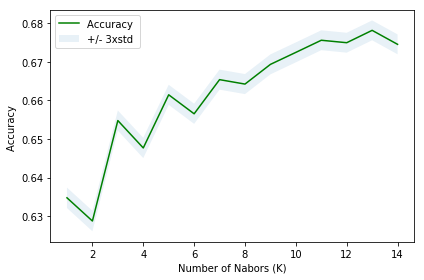

In [35]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [49]:
#KNN
# Building the model again, using k=13
k = 13
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn_yhat = kNN_model.predict(X_test)
knn_yhat

array(['1', '2', '2', ..., '2', '1', '2'], dtype='<U21')

In [50]:
f1score= f1_score(y_test, knn_yhat, average='weighted')
f1score

0.6781137475097472

In [52]:
confusion_matrix(y_test,  knn_yhat)

array([[11203,  5572],
       [ 5095, 11270]])

In [38]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR=LR.predict(X_test)
f1score= f1_score(y_test, yhat_LR, average='weighted')
f1score


0.655031974822324

In [39]:
confusion_matrix(y_test,  yhat_LR)

array([[11671,  5104],
       [ 6308, 10057]])

In [69]:
#Decision Tree
Tree = DecisionTreeClassifier(criterion="entropy",max_depth=8)
trained_model=Tree.fit(X_train, y_train)
yhat_t=Tree.predict(X_test)
f1score= f1_score(y_test, yhat_t, average='weighted')
#yhat_t=Tree.predict(X_train)
#f1score= f1_score(y_train, yhat_t, average='weighted')
f1score

0.6889997616076476

In [51]:
confusion_matrix(y_test,  yhat_t)

array([[10477,  6298],
       [ 4451, 11914]])

In [70]:
Tree.feature_importances_

array([3.87650520e-01, 6.09489184e-01, 2.24915084e-04, 4.80415245e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.40487472e-04, 5.63998933e-04, 0.00000000e+00, 3.88874494e-04,
       0.00000000e+00, 1.36439308e-04, 1.01571923e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.23593071e-04])

In [43]:
!pip install pydotplus
!pip install pydot

In [44]:
import pydotplus
from io import StringIO
import pydot

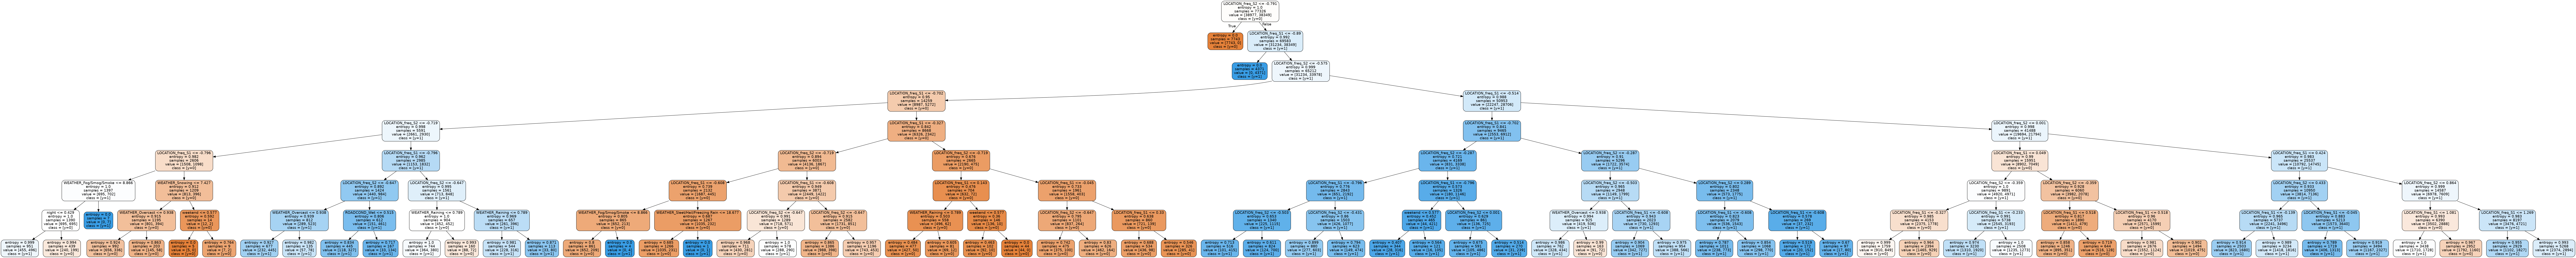

In [71]:
from IPython.display import Image
from sklearn import tree

out_file = tree.export_graphviz(
    trained_model,
    feature_names   = Feature.columns.values,
    class_names     = ['[y=0]', '[y=1]'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph = pydotplus.graph_from_dot_data(out_file)
Image(graph.create_png())